In [1]:
import polyseq as pseq
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pseq.io.download_example_data()

data = pseq.io.load_example()
data.head()

,Nep3,tRNA:Pro-CGG-1-1,CG9570,Or19b,CG15322,Or19a,karr,fd19B,CG17003,CG12655,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dropped = data.drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(906, 17492)
(906, 9130)


,min,max,mean,median
umis,0,1053,0,0
umis above 0,1,1053,2,1
umis per cell cell,743,11228,1486,1164
genes expressed,362,2818,742,662
umis per gene,1,77103,147,28
cells expressing,0,906,23,1


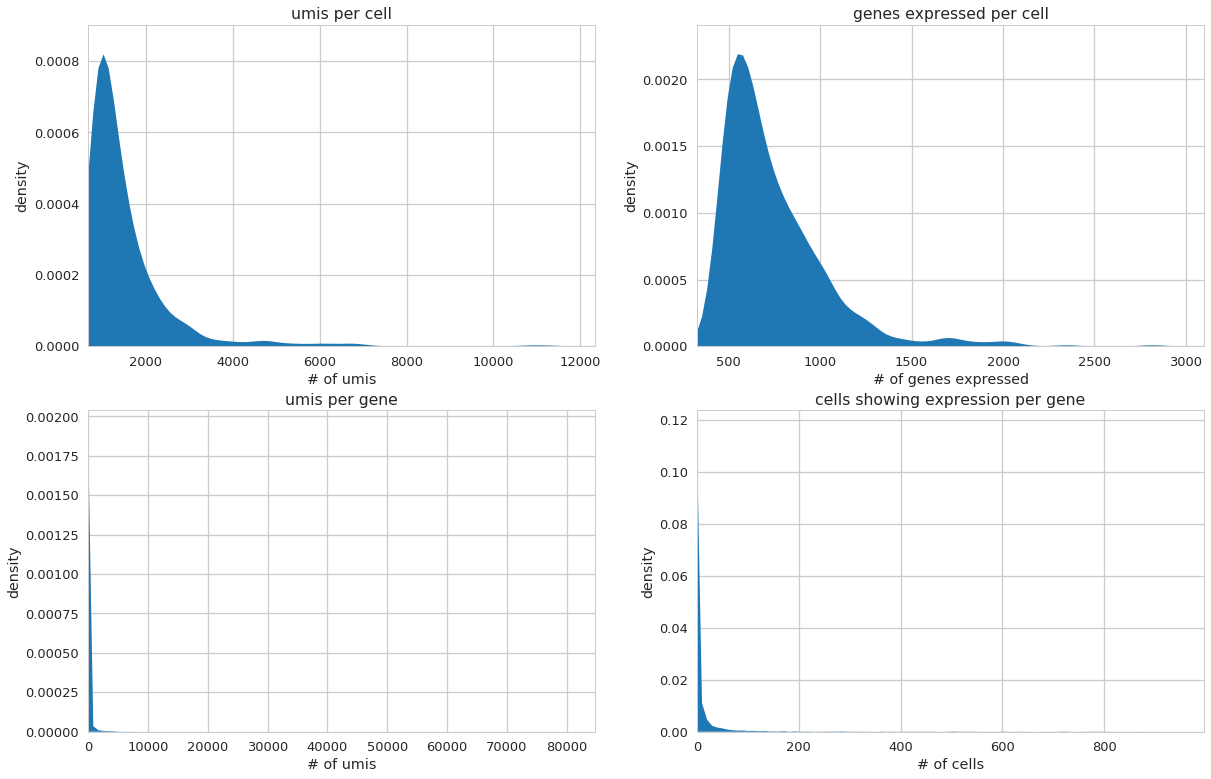

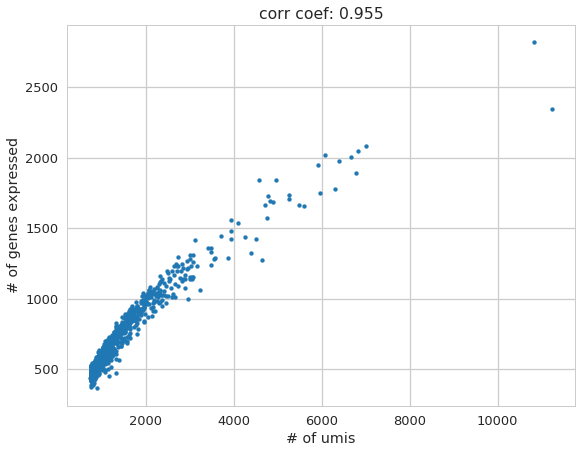

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [5]:
import numpy as np

normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total[:, np.newaxis])
regressed.head()

,Nep3,CG33217,Vps11,RpL10,G9a,cin,y,sc,l(1)sc,ase,...,CG5118,Plap,CG5080,Tfb4,Pino,CG4629,S,EGFP,tdTomato,GAL4
0,-0.550409,-0.805103,-0.772099,-0.260244,-0.975793,-0.413805,-0.511423,0.049744,-0.097752,-0.275277,...,-0.192668,-0.776220,-0.533113,-0.297524,-0.550203,-0.586450,-1.213666,-0.435544,-0.570921,-0.078332
1,4.097735,2.769397,-0.339962,-0.321946,-0.494048,-0.200104,-0.193864,-0.022132,-0.062985,-0.145458,...,-0.121801,-0.280349,-0.236816,-0.131499,-0.232080,-0.288634,-0.537623,5.748263,-0.231110,-0.110789
2,-0.134333,-0.174923,-0.123434,0.081624,-0.252664,-0.093026,-0.034747,-0.058147,-0.045565,-0.080411,...,-0.086293,-0.031887,-0.088352,-0.048311,4.960913,-0.139410,2.323554,-0.087804,-0.060843,-0.127052
3,-0.143933,-0.189462,-0.138400,1.026878,-0.269348,-0.100427,-0.045744,-0.055657,-0.046769,-0.084907,...,9.041346,-0.049060,-0.098613,-0.054060,-0.083698,-0.149724,2.300141,-0.095827,-0.072611,-0.125928
4,-0.200246,2.879925,-0.226192,0.189724,-0.367218,-0.143842,-0.110259,-0.041055,-0.053832,-0.111281,...,-0.103144,-0.149800,-0.158809,-0.087790,-0.148328,-0.210227,-0.359639,-0.142891,-0.141647,-0.119334


,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14
0,10.861227,33.258132,4.276391,-3.812966,8.105975,-3.789846,10.038519,9.984907,6.910716,-17.119629,-0.176599,20.798520,27.419413,-11.519695,-36.733073
1,-8.118297,-2.722269,-3.419710,2.318427,-0.696114,0.696780,-1.086741,0.302203,3.811150,2.573973,-0.734018,2.865650,1.372999,-2.780326,-3.342270
2,11.239750,-5.271430,1.715597,3.683880,-1.634262,1.541546,0.038120,2.344477,-0.240992,-2.084155,-0.924017,-1.202984,-0.379803,4.565999,0.777263
3,5.608078,4.255528,2.407885,0.370477,0.320722,-0.519259,0.381763,-0.659932,-0.410449,-0.112504,0.314972,-0.425771,1.509965,2.585996,-1.306401
4,-1.221448,1.303268,4.471903,-4.487940,3.945575,-0.900917,0.269968,-2.053054,-4.187509,-0.937382,-0.357609,0.460058,0.419608,-1.485753,-2.175906


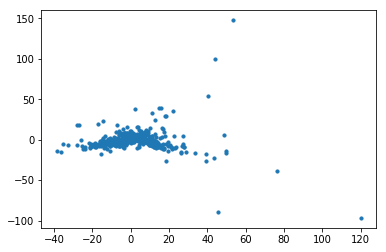

In [6]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [ ]:
clusters = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: ", len(np.unique(clusters)))

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1107017993927002 seconds
Jaccard graph constructed in 1.004469871520996 seconds
Wrote graph to binary file in 0.21361422538757324 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.622924
Louvain completed 21 runs in 0.6938879489898682 seconds
PhenoGraph complete in 2.0854058265686035 seconds
# of clusters:  5


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=10.0, verbose=True).fit_transform(reduced)
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=clusters, cmap='tab20')

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 906 samples in 0.001s...
[t-SNE] Computed neighbors for 906 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 906 / 906
[t-SNE] Mean sigma: 1.858056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.289536


In [ ]:
top_genes = pseq.upregulated(normed, clusters, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

In [ ]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, groups=clusters, cluster_genes=False)